In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes

In [47]:
diabetes_data = load_diabetes()
df_diabetes = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df_diabetes['target'] = diabetes_data.target
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [48]:
df_diabetes.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [54]:
X = diabetes.iloc[:, 2:3].values
y = diabetes.iloc[:, -1].values

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [56]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [57]:
print('Coefficients: \n', regressor.coef_)
print('Independent term \n', regressor.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))

Coefficients: 
 [1013.17358257]
Independent term 
 153.43509039227231
Mean squared error: 3921.37


In [58]:
print(regressor.score(X_test, Y_test))
print('Coefficient of determination: %.2f' % r2_score(Y_test, y_pred))

0.23132831307953794
Coefficient of determination: 0.23


Text(0.5, 0.98, 'Linear Regression Model')

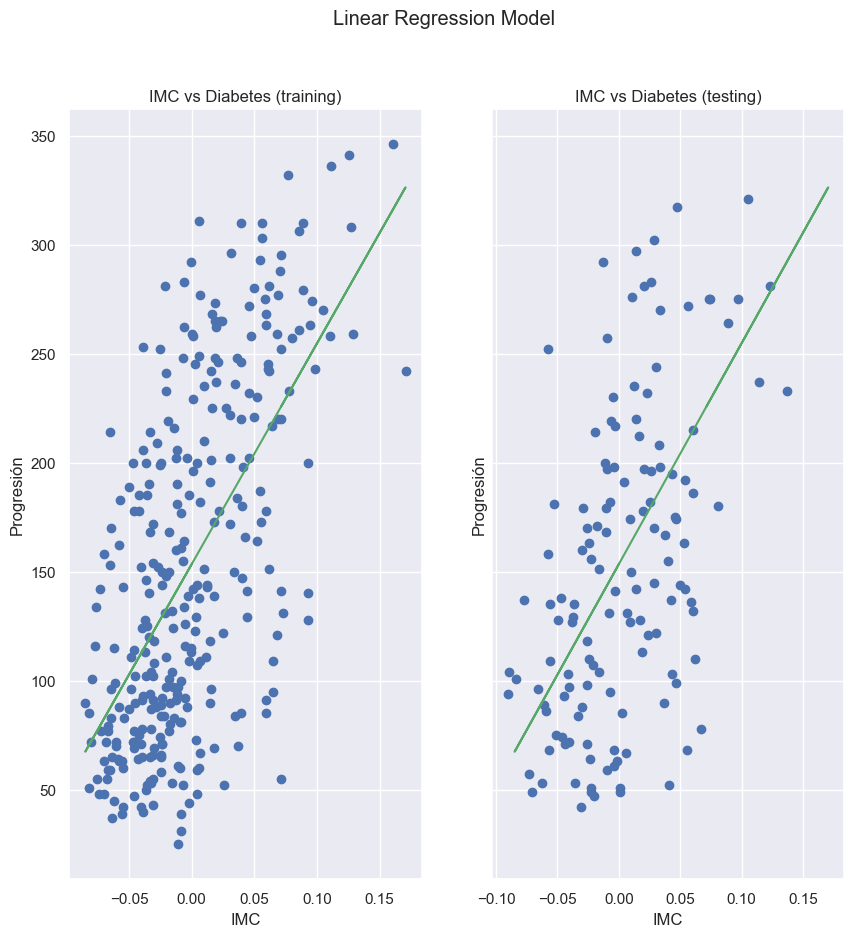

In [59]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
ax[0].scatter(X_train, Y_train)
ax[0].plot(X_train, regressor.predict(X_train), c='g')
ax[0].set_title('IMC vs Diabetes (training)')
ax[0].set_xlabel('IMC')
ax[0].set_ylabel('Progresión')
ax[1].scatter(X_test, Y_test)
ax[1].plot(X_train, regressor.predict(X_train), c='g')
ax[1].set_title('IMC vs Diabetes (testing)')
ax[1].set_xlabel('IMC')
ax[1].set_ylabel('Progresión')
plt.suptitle('Linear Regression Model')